In [1]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('clean_auto_data.csv')
data_df['cylinders'] = data_df['cylinders'].astype('category')
data_df['model_year'] = data_df['model_year'].astype('category')

In [2]:
data_df[['mpg','displacement']][:2]

,mpg,displacement
0,18.0,307.0
1,15.0,350.0


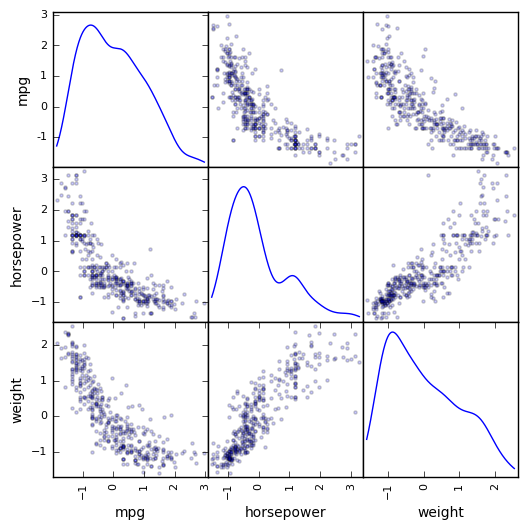

In [6]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

a=scatter_matrix(data_df[['mpg','horsepower','weight']], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [7]:

from sklearn.preprocessing import StandardScaler

cont_feats = ['mpg','displacement', 'horsepower', 'weight', 'acceleration']
data_df[cont_feats] = StandardScaler().fit_transform(
    data_df[cont_feats]
)


In [9]:
data_df[:2]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.698638,8,1.077290,0.664133,0.620540,-1.285258,70
1,-1.083498,8,1.488732,1.574594,0.843334,-1.466724,70


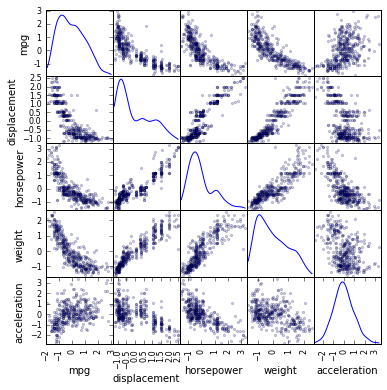

In [9]:
a=scatter_matrix(data_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [10]:
from sklearn.cross_validation import KFold
kf = KFold(len(data_df), n_folds=10, shuffle=True, random_state=43)
kf

sklearn.cross_validation.KFold(n=392, n_folds=10, shuffle=True, random_state=43)

In [40]:
import patsy
import statsmodels.api as sm
from sklearn.metrics import r2_score

alphas = [0.2,0.1,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-1,-2,-4,-6,-9]


models = ['mpg ~ weight',
          'mpg ~ cylinders',
          'mpg ~ weight + I(weight**2)', 
          'mpg ~ weight + I(weight**2)+ I(weight**3)', 
         'mpg ~ model_year+weight',
         'mpg ~ I(weight**2) + model_year + I(horsepower*acceleration) + displacement + cylinders',
         'mpg ~ weight + I(weight**2)+ I(weight**3) + cylinders  + horsepower + I(weight*horsepower) + acceleration + I(weight*acceleration) + model_year',
         'mpg ~ weight + I(weight**2) + (acceleration*displacement) + model_year',
         'mpg ~ horsepower + I(horsepower**2) + weight + I(weight**2) + displacement + I(displacement**2) + model_year + I(weight**3)',
         'mpg ~ weight * horsepower + model_year',
         'mpg ~ weight* horsepower* model_year',
          'mpg ~ weight * acceleration * model_year',
          'mpg ~ weight* horsepower* model_year*displacement*acceleration',
          'mpg ~ (horsepower*acceleration*displacement*weight) + model_year' 
          
]

# models = ['mpg ~ weight',
#           'mpg ~ I(model_year*model_year)'
#           'mpg ~ weight + I(weight**2)', 
#           'mpg ~ weight + I(weight**2)+ I(weight**3)',
#           'mpg ~ weight + mpg*weight + weight*horsepower + model_year + I((displacement*weight)**2)']
for mm in models:
    outof_sample = []
    in_sample = []
    for train_index, test_index in kf:
        train_df = data_df.iloc[train_index]
        y_train, X_train = patsy.dmatrices(mm, data=train_df, return_type='dataframe')
        model = sm.OLS(y_train, X_train).fit()
        
        in_sample.append( r2_score( model.predict(X_train),y_train) )
        test_df = data_df.iloc[test_index]
        y_test, X_test = patsy.dmatrices(mm, data=test_df, return_type='dataframe')
        outof_sample.append(r2_score(model.predict(X_test),y_test))
    print '------------------'
    print mm
    print 'R^2 outof_sample',np.mean(outof_sample),'R^2 in sample', np.mean(in_sample)
    print '------------------'

------------------
mpg ~ weight
R^2 outof_sample 0.501068869665 R^2 in sample 0.556340364328
------------------
------------------
mpg ~ cylinders
R^2 outof_sample 0.384539569509 R^2 in sample 0.441366838111
------------------
------------------
mpg ~ weight + I(weight**2)
R^2 outof_sample 0.560822625599 R^2 in sample 0.601774640746
------------------
------------------
mpg ~ weight + I(weight**2)+ I(weight**3)
R^2 outof_sample 0.558810943366 R^2 in sample 0.601917252891
------------------
------------------
mpg ~ model_year+weight
R^2 outof_sample 0.77775402983 R^2 in sample 0.813187806094
------------------
------------------
mpg ~ I(weight**2) + model_year + I(horsepower*acceleration) + displacement + cylinders
R^2 outof_sample 0.794938907511 R^2 in sample 0.823779551672
------------------
------------------
mpg ~ weight + I(weight**2)+ I(weight**3) + cylinders  + horsepower + I(weight*horsepower) + acceleration + I(weight*acceleration) + model_year
R^2 outof_sample 0.85695291895 R^

In [32]:
models = ['mpg ~ weight',
          'mpg ~ weight + I(weight**2)', 
          'mpg ~ weight + I(weight**2)+ I(weight**3)',
          'mpg ~ weight + mpg*weight + weight*horsepower + model_year + I((displacement*weight)**2)']

In [17]:

import patsy
import statsmodels.api as sm
from sklearn.metrics import r2_score

#mpg	cylinders	displacement	horsepower
#weight	acceleration	model_year

models = ['mpg ~ weight','mpg ~ weight + displacement', 
          'mpg ~ weight + displacement + acceleration',
          'mpg ~ weight + displacement + acceleration + horsepower'
         ]

for mm in models:
    outof_sample = []
    in_sample = []
    for train_index, test_index in kf:
        train_df = data_df.iloc[train_index]
        y_train, X_train = patsy.dmatrices(mm, data=train_df, return_type='dataframe')
        model = sm.OLS(y_train, X_train).fit()
        in_sample.append( r2_score( model.predict(X_train),y_train) )
        test_df = data_df.iloc[test_index]
        y_test, X_test = patsy.dmatrices(mm, data=test_df, return_type='dataframe')
        outof_sample.append(r2_score(model.predict(X_test),y_test))
    print '------------------'
    print mm
    print 'R^2 outof_sample',np.mean(outof_sample),'R^2 in sample', np.mean(in_sample)
    print '------------------'



------------------
mpg ~ weight
R^2 outof_sample 0.501068869665 R^2 in sample 0.556340364328
------------------
------------------
mpg ~ weight + displacement
R^2 outof_sample 0.517233821951 R^2 in sample 0.569523871196
------------------
------------------
mpg ~ weight + displacement + acceleration
R^2 outof_sample 0.522156117123 R^2 in sample 0.575270478307
------------------
------------------
mpg ~ weight + displacement + acceleration + horsepower
R^2 outof_sample 0.530989059498 R^2 in sample 0.58609602892
------------------
